In [1]:
#from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [63]:
import plotly.express as px
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)


#To display the plots

from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = "notebook"

In [2]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_json("deneme.json", lines=True)
df

id      conversation_id  \
0      1565674777792102400  1565662890388033536   
1      1565674720267231232  1565674720267231232   
2      1565674680157077504  1565662890388033536   
3      1565674553908629504  1565674553908629504   
4      1565674530030452736  1565674530030452736   
...                    ...                  ...   
58081  1564116440059416576  1564116440059416576   
58082  1564113748792643590  1564113748792643584   
58083  1564104073191866370  1564104073191866368   
58084  1564099119643521024  1564099119643521024   
58085  1564070332440379393  1564070332440379392   

                                     created_at       date      time  \
0      2022-09-02 15:15:30 Turkey Standard Time 2022-09-02  15:15:30   
1      2022-09-02 15:15:16 Turkey Standard Time 2022-09-02  15:15:16   
2      2022-09-02 15:15:07 Turkey Standard Time 2022-09-02  15:15:07   
3      2022-09-02 15:14:37 Turkey Standard Time 2022-09-02  15:14:37   
4      2022-09-02 15:14:31 Turkey Standard Time 2022-09-02  15:14:31   
...                                         ...        ...       ...   
58081  2022-08-29 08:03:13 Turkey Standard Time 2022-08-29  08:03:13   
58082  2022-08-29 07:52:32 Turkey Standard Time 2022-08-29  07:52:32   
58083  2022-08-29 07:14:05 Turkey Standard Time 2022-08-29  07:14:05   
58084  2022-08-29 06:54:24 Turkey Standard Time 2022-08-29  06:54:24   
58085  2022-08-29 05:00:00 Turkey Standard Time 2022-08-29  05:00:00   

       timezone              user_id         username  \
0           300  1452305859556651016    ersin_sarigl2   
1           300  1197131521703976961  cengizfatihzyu1   
2           300            730616797     busrakalkann   
3           300  1300101659876560901     busraturun55   
4           300           3372383553     defence_turk   
...         ...                  ...              ...   
58081       300  1469694257485303808        haberfama   
58082       300           3431414049        tkgmgovtr   
58083       300   959166521833672704        mematakum   
58084       300  1019979433497657345   turkinesia_net   
58085       300             82943239            sabah   

                                     name place  ... geo source user_rt_id  \
0                           Ersin Sarigül        ...                         
1                     Cengiz Fatih Özyurt        ...                         
2                            Büşra Kalkan        ...                         
3                             Büşra Turun        ...                         
4                            DEFENCE TURK        ...                         
...                                   ...   ...  ...  ..    ...        ...   
58081             Haber Fama - Son Dakika        ...                         
58082                    Tapu ve Kadastro        ...                         
58083  Atakum İlçe Milli Eğitim Müdürlüğü        ...                         
58084                          Turkinesia        ...                         
58085                      Sabah Gazetesi        ...                         

      user_rt retweet_id                                           reply_to  \
0                         [{'screen_name': 'teknofest', 'name': 'TEKNOFE...   
1                                                                        []   
2                         [{'screen_name': 'teknofest', 'name': 'TEKNOFE...   
3                                                                        []   
4                                                                        []   
...       ...        ...                                                ...   
58081                                                                    []   
58082                                                                    []   
58083                                                                    []   
58084                                                                    []   
58085                                                  

In [5]:
df.tweet

0        @teknofest Fasa fiso bom boş bir teknoloji fes...
1                                         TEKNOFEST 2022 🖤
2                                          @teknofest 🇹🇷❤️
3        #TEKNOFEST2022 @teknofest  https://t.co/HYktDa...
4        🛡️🇹🇷KIZILELMA, TEKNOFEST KARADENİZ ve SİPER | ...
                               ...                        
58081    Teknofest rüzgârı Samsun’da esecek  https://t....
58082    #tkgm #tapuvekadastro #teknofest #teknofest202...
58083    "Büyükşehir Açık Sahne 🎶 #TEKNOFEST Konserleri...
58084    Prototipe kedua dari jet tempur tanpa awak #Ki...
58085    TEKNOFEST Karadeniz, 30 Ağustos salı günü Sams...
Name: tweet, Length: 58086, dtype: object

In [6]:
# **Word Tokenization and lowercase**
df["tweet"]=df["tweet"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["tweet"]=df["tweet"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('turkish')
df["tweet"]=df["tweet"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["tweet"]=df["tweet"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["tweet"]=df["tweet"].apply(lambda x: " ".join(x))

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
a = " ".join(df["tweet"])

In [55]:
a

'teknofest fasa fiso bom boş bir teknoloji festivali teknofest teknofest teknofest http teknofest ağ merkezli sohbetler bölüm http http teknofest türkiye teknofest geççek teknofest devamke http teknofest teknofest nice bomb plan http ymzzzcb ucbuzluviski teknofest kelime oyunları yapmayın herkes cumaya gidiyor yükümlülük peki cumanın farz bir ibadet olduğu gerçeğini değiştiriyor bunu yargılamak bize düşmez sırf konuyu buraya getirdiğiniz cevap verdim trtcocuk teknofest aslan teknofest sağlıkta yapay zeka yarışması biyoinformatik analiz kategorisinde belediyemizin sponsor olduğu vehbi dinçerler fen lisesi öğrencilerimiz orhan yağız çınar utku özmelioglu finaldeler başarılar http teknofest teknofest kelimetullâh teknofest bin ekip arasından finale kalan siber güvenlik uzmanı can cebeci ekibi geliştirdikleri as siber atölye siber alanda terörle mücadele etmeyi hedefliyorlar samsun samsunhaber http teknofest hayırlı cumalar ο σελτσούκ μπαϊρακτάρ πέταξε το αεροσκάφος τουρκικής κατασκεύης hü

In [60]:

words = a.split(" ")

counter = {}

for word in words:
    if word not in counter:
            counter[word] = 0
    counter[word] += 1


words_used = pd.Series(counter).sort_values(ascending=False)[:20]

words_used


teknofest             60203
http                  41581
samsun                 9746
bir                    7533
bayraktar              5656
teknoloji              5151
e                      5118
selcuk                 4379
ziyaret                3743
selçuk                 3729
teknofestkaradeniz     3612
büyük                  3231
i                      3227
karadeniz              3014
türkiye                2543
ilk                    2490
kılıçdaroğlu           2482
festivali              2400
te                     2375
uzay                   2229
dtype: int64

In [65]:
clean_words = pd.DataFrame(words_used.drop(["http","e","i","te"])[:20], columns=["count"])
clean_words

count
teknofest           60203
samsun               9746
bir                  7533
bayraktar            5656
teknoloji            5151
selcuk               4379
ziyaret              3743
selçuk               3729
teknofestkaradeniz   3612
büyük                3231
karadeniz            3014
türkiye              2543
ilk                  2490
kılıçdaroğlu         2482
festivali            2400
uzay                 2229

In [80]:

fig = px.treemap(clean_words, path=[clean_words.index],values='count', width=800, height=400,color="count")
fig.update_layout(margin = dict(t=.5, l=.5, r=.5, b=.5))
fig.show()

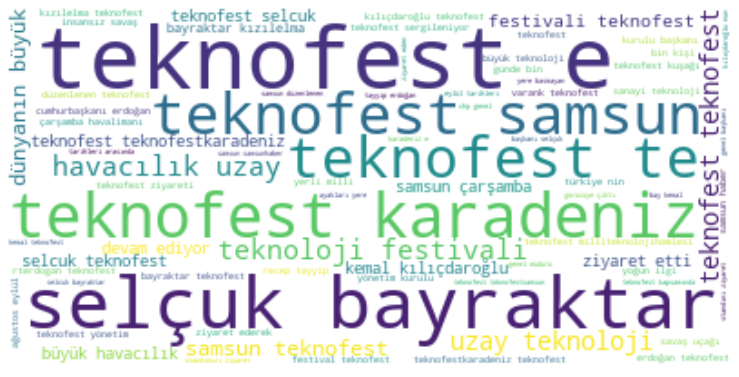

In [47]:
wordcloud = WordCloud(background_color="white", max_words=200)
wordcloud.generate(a)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()